<a href="https://colab.research.google.com/github/nshzk8975/fastai/blob/master/Lesson2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.vision import *

In [9]:
folder = 'small-size_car'
file = 'Small-size_cars.txt'

path = Path('data/cars')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

download_images(path/file, dest, max_pics=200)

Error https://%E8%BB%BD%E8%87%AA%E5%8B%95%E8%BB%8A%E8%B2%B7%E5%8F%96%E6%9F%BB%E5%AE%9A.net/wp/wp-content/uploads/2017/12/1712211200.jpg encoding with 'idna' codec failed (UnicodeError: label empty or too long)


In [11]:
folder = 'standard-size_car'
file = 'Standard-size_car.txt'

path = Path('data/cars')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

download_images(path/file, dest, max_pics=200)

Error http://%E8%BB%8A%E4%B8%AD%E6%B3%8A%E9%81%93%E3%81%AE%E9%A7%85.com/wp-content/uploads/2016/04/shuttle01.jpg HTTPConnectionPool(host='%e8%bb%8a%e4%b8%ad%e6%b3%8a%e9%81%93%e3%81%ae%e9%a7%85.com', port=80): Max retries exceeded with url: /wp-content/uploads/2016/04/shuttle01.jpg (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f53702654a8>: Failed to establish a new connection: [Errno -2] Name or service not known',))


In [12]:
folder = 'medium-size_car'
file = 'Medium-size_car.txt'

path = Path('data/cars')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

download_images(path/file, dest, max_pics=200)

Error https://%E9%81%8B%E8%BB%A2%E5%85%8D%E8%A8%B1.net/wp-content/uploads/2017/11/cyugata_track_03.jpg HTTPSConnectionPool(host='%e9%81%8b%e8%bb%a2%e5%85%8d%e8%a8%b1.net', port=443): Max retries exceeded with url: /wp-content/uploads/2017/11/cyugata_track_03.jpg (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f5370265320>: Failed to establish a new connection: [Errno -2] Name or service not known',))
Error https://%E9%81%8B%E8%BB%A2%E5%85%8D%E8%A8%B1.net/wp-content/uploads/2017/11/cyugata_track_08-800x600.jpg HTTPSConnectionPool(host='%e9%81%8b%e8%bb%a2%e5%85%8d%e8%a8%b1.net', port=443): Max retries exceeded with url: /wp-content/uploads/2017/11/cyugata_track_08-800x600.jpg (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x7f53702650f0>: Failed to establish a new connection: [Errno -2] Name or service not known',))


In [13]:
folder = 'large‐size_car'
file = 'Large‐size_car.txt'

path = Path('data/cars')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

download_images(path/file, dest, max_pics=200)

In [0]:
classes = ['small-size_car', 'standard-size_car', 'medium-size_car', 'large‐size_car']

In [19]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

small-size_car


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file <_io.BufferedReader name='data/cars/small-size_car/00000041.png'>
standard-size_car


medium-size_car


large‐size_car


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [21]:
data.classes

['large‐size_car', 'medium-size_car', 'small-size_car', 'standard-size_car']

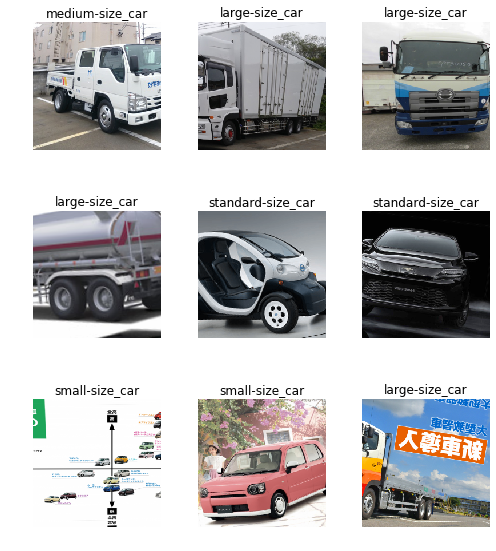

In [22]:
data.show_batch(rows=3, figsize=(7,8))

In [32]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['large‐size_car', 'medium-size_car', 'small-size_car', 'standard-size_car'],
 4,
 314,
 78)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [34]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.872597,1.133181,0.423077,00:12
1,1.426094,0.754210,0.294872,00:13
2,1.226263,0.650621,0.282051,00:13
3,1.078486,0.656484,0.282051,00:14
4,0.993777,0.648951,0.256410,00:13


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [37]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


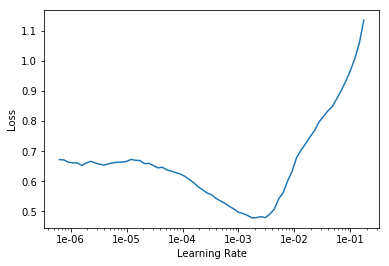

In [38]:
learn.recorder.plot()

In [39]:
learn.fit_one_cycle(2, max_lr=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.709969,0.648343,0.256410,00:13
1,0.685231,0.650480,0.230769,00:13
